In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#載入MNIST數據庫
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [6]:
#輸入格式整理
x_train=x_train.reshape(60000,28,28,1)

x_test=x_test.reshape(10000,28,28,1)

In [7]:
x_train[9487].shape

(28, 28, 1)

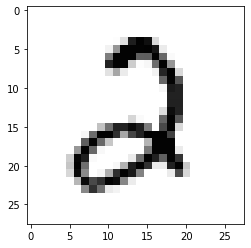

In [10]:
X=x_train[9487][:,:,0]
plt.imshow(X,cmap='Greys')

In [11]:
#輸出格式整理
from keras.utils import np_utils
#將資料變成one-hot encoding
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [15]:
#讀入相關套件
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

In [34]:
#建構神經網路
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [38]:
model.add(Flatten())

model.add(Dense(200))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [39]:
model.compile(loss='mse',optimizer=SGD(lr=0.05),metrics=['accuracy'])

In [40]:
#檢視神經網路
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)        

In [41]:
#訓練神經網路
model.fit(x_train,y_train,batch_size=100,epochs=12)

Epoch 1/12
60000/60000 [==============================] - 50s 839us/step - loss: 0.0468 - accuracy: 0.7149
Epoch 2/12
60000/60000 [==============================] - 45s 753us/step - loss: 0.0053 - accuracy: 0.9651
Epoch 3/12
60000/60000 [==============================] - 46s 769us/step - loss: 0.0034 - accuracy: 0.9777
Epoch 4/12
60000/60000 [==============================] - 45s 757us/step - loss: 0.0027 - accuracy: 0.9828
Epoch 5/12
60000/60000 [==============================] - 44s 725us/step - loss: 0.0022 - accuracy: 0.9866
Epoch 6/12
60000/60000 [==============================] - 44s 728us/step - loss: 0.0019 - accuracy: 0.9885
Epoch 7/12
60000/60000 [==============================] - 43s 721us/step - loss: 0.0015 - accuracy: 0.9905
Epoch 8/12
60000/60000 [==============================] - 51s 857us/step - loss: 0.0013 - accuracy: 0.9920
Epoch 9/12
60000/60000 [==============================] - 50s 836us/step - loss: 0.0011 - accuracy: 0.9932
Epoch 10/12
60000/60000 [============

In [47]:
#顯示損失分數與準確度
score=model.evaluate(x_test,y_test)
print('loss: ',score[0])
print('acc: ',score[1])

loss:  0.0019508467660600533
acc:  0.9868999719619751


In [48]:
#儲存結果
model_json=model.to_json()
open('handwriting_model_cnn.json','w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

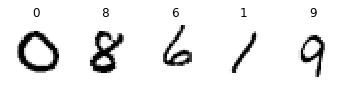

In [55]:
#每次顯示五個數字，檢視是否有正確辨識
predict=model.predict_classes(x_test)

pick=np.random.randint(1,9999,5)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis('off')